In [1]:
#animation of results
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean  
import numpy as np 
import sys
import xarray as xr

In [25]:
ds = xr.open_mfdataset(['/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc']).isel(s_rho=-1)
ds_var = ds["zeta"].resample(time='3H').mean(dim='time')
#ds_var.transpose().values
zeta = np.array(ds_var.values)
zeta = zeta.reshape(zeta.shape[-3],-3)
#zeta = np.pad(zeta, pad_width=0, mode='constant', constant_values=0)
zeta.shape

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


(16, 3153556)

In [ ]:
lon = ds["lon"]
lat = ds["lat"]

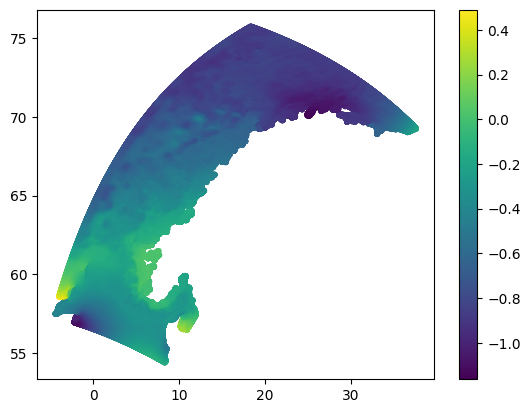

In [26]:
plt.scatter(lon, lat, c=zeta[0], s=10)
plt.colorbar()

In [40]:
def results_animation(file_path1, file_path2 ,variable, dir, frame, start_time, **kwargs):
    ds = xr.open_mfdataset([file_path1, file_path2]).isel(s_rho=-1)
    ds_var = ds[f'{variable}'].resample(time='3H').mean(dim='time')
    ds_var = np.array(ds_var)
    ds_var = ds_var.reshape(ds_var.shape[-3], -3)
    print(ds_var.shape)
    longitude = ds["lon"]
    latitude = ds["lat"]
    fig,ax = plt.subplots(figsize = (12,8))
    sc = ax.scatter(longitude.values, latitude.values, c=ds_var[start_time], cmap = cmocean.cm.speed, **kwargs)
    cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", label = variable)
        
    def update(frame):
        sc.set_array(ds_var[frame])
        ax.set_title(f'Time step: {frame *3} hrs')
        ax.set_xlabel(f'Longitude [$\circ$]')
        ax.set_ylabel(f'Latitude [$\circ$]')
        return sc 
    
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    ani.save(f'{dir}/animation_{variable}.gif', writer="imagemagick")

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


(16, 3153556)


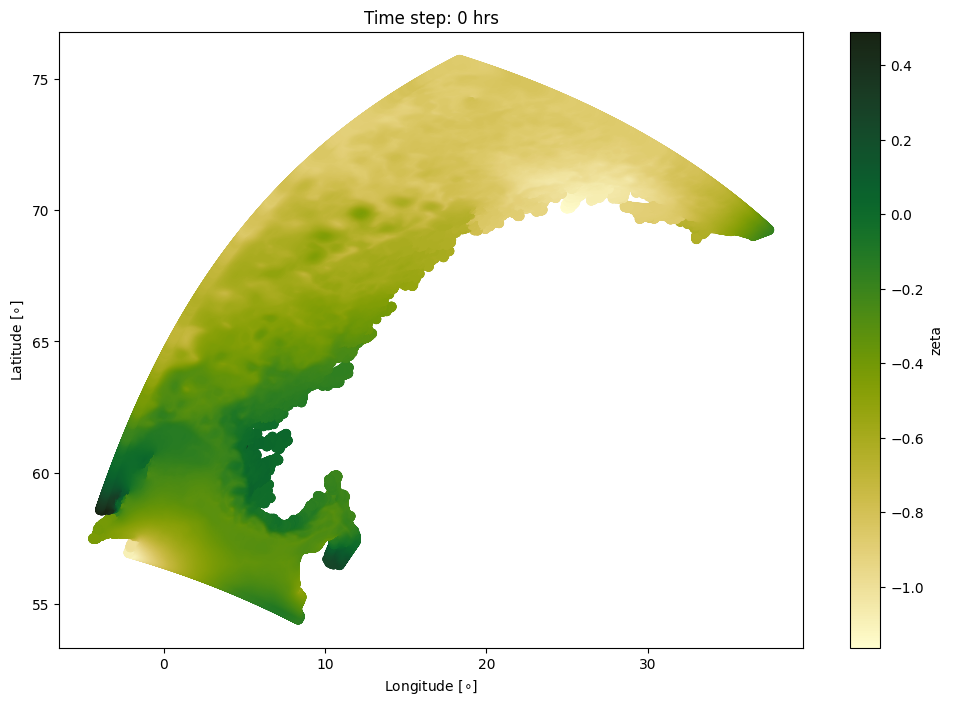

In [41]:
results_animation(file_path1='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable='zeta', dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0)

In [42]:
#klarte å erstatte zeta for resultatfilene så plotter raskt for zeta ngpus også

In [44]:
from script_animation_results import results_animation

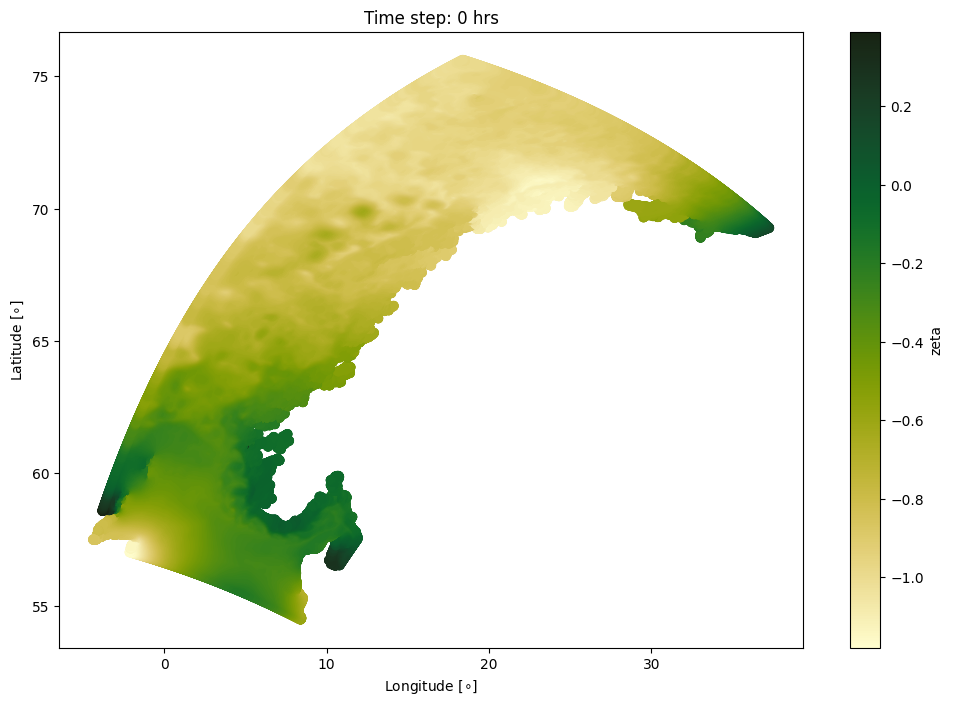

In [46]:
results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', start_time=0, frame=16)

In [1]:
from script_animation_results import animation_compare

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - før
lon: (3076056,), lat: (3076056,), ds1_var_vals: (3076056,)
Image 1 - etter


ValueError: 'c' argument has 3155556 elements, which is inconsistent with 'x' and 'y' with size 3076056.

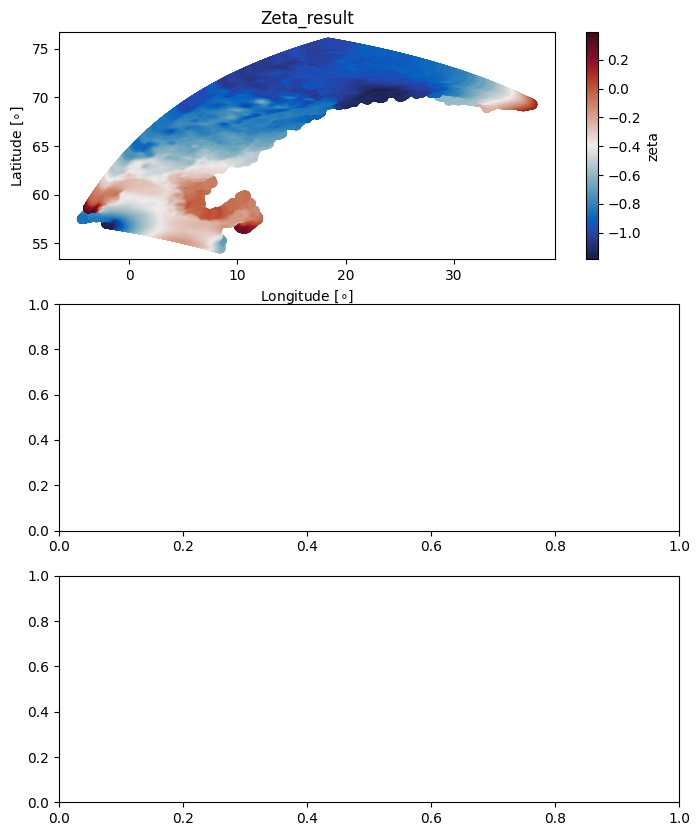

In [2]:
animation_compare(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="zeta", variable2="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Zeta_result', title2='Zeta_norkyst')